## Notes

Guys I see Motreal has very fue businesses and few reviews. You can see that at the histograms. Probably we should consider changing or at least take that into account for our analysis - Andreas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
business_df= pd.read_csv("data/csv/yelp_academic_dataset_business.csv")
#business_df.info()

In [3]:
print("Number of Businesses")

print("Las Vegas:",len(business_df[business_df.city=="Las Vegas"]))
print("Edinburgh:",len(business_df[business_df.city=="Edinburgh"]))
print("Montreal :",len(business_df[business_df.city=="Montreal"]))

Number of Businesses
Las Vegas: 22892
Edinburgh: 3601
Montreal : 201


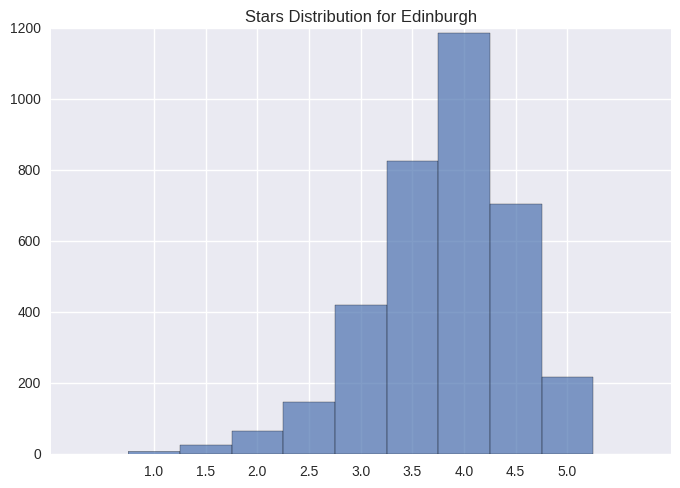

In [4]:
edinburgh = business_df[business_df.city == 'Edinburgh']

n_total, bins, patch = plt.hist(edinburgh.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for Edinburgh")
plt.show()

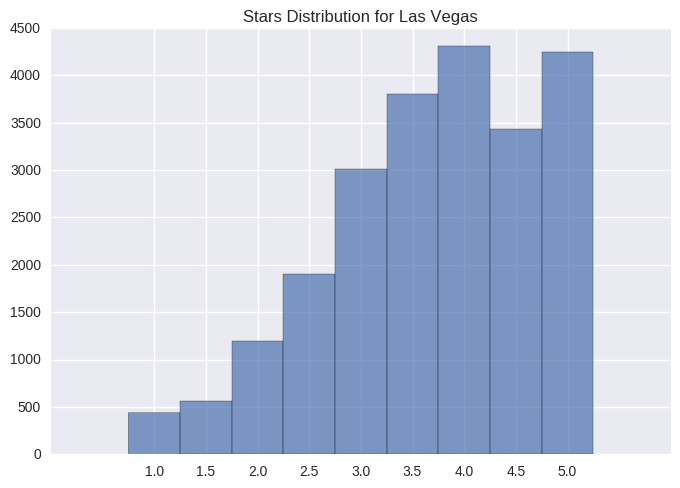

In [5]:
LV = business_df[business_df.city == 'Las Vegas']

n_total, bins, patch = plt.hist(LV.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for Las Vegas")
plt.show()

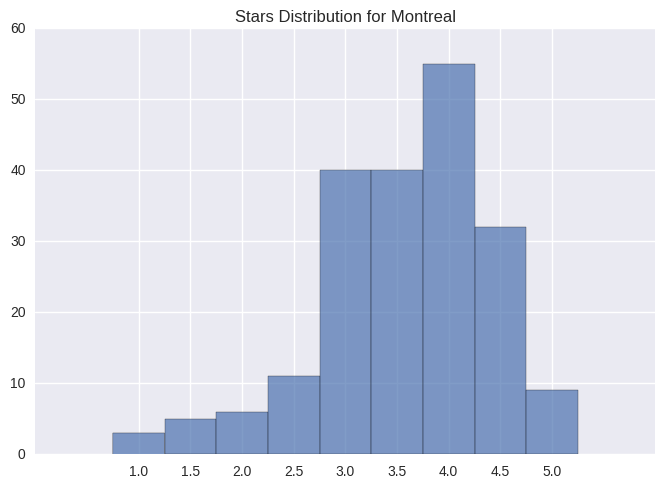

In [6]:
Montreal = business_df[business_df.city == 'Montreal']

n_total, bins, patch = plt.hist(Montreal.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for Montreal")
plt.show()